# Proyecto Juancho: Análisis Exploratorio de Datos
## Predicción de victoria en partidas de League of Legends

## 1. Introducción
### Pipeline del proyecto

1. Dataset original
2. Generación de dataset sucio
3. Limpieza y validación
4. Análisis exploratorio

En este proyecto se analiza un dataset de partidas competitivas de League of Legends con el objetivo de explorar qué variables influyen más en la victoria del equipo azul.

El dataset original se encontraba totalmente limpio, por lo que he generado una versión con datos artificialmente "ensuciados" para realizar un proceso completo de limpieza y preprocesamiento.
Tras limpiar los datos, se procede a realizar el análisis exploratorio.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("..")) 
from src.io import load_data
from src.features import (
    # Necesito importar una nuevas columnas creadas por mi como "redWins", "baronDiff", etc y asi poder comparar mejor en las gráficas
    create_win_features,
    create_diff_features,
    create_dominance_score
)
from src.viz import (
    plot_team_comparison,
    plot_fill_between_diff,
    plot_objectives_3d,
    plot_dominance_score
)
df = pd.read_csv('../data/processed/datos_lol_limpio.csv')
df = create_win_features(df)
df.head()
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   float64
 13  blueAvgLevel  

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,redWins
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.363903,...,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140,0.500962
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.483245,...,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841,0.500024
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000,0.000000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000,1.000000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000,1.000000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,2.000000,...,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,1.000000


*Tras esta pequeña muestra del dataset podemos comprobar como está totalmente limpio, no hay valores nulos o erróneos. La limpieza del dataset funciona.*

## Ahora vamos a visualizar los datos
---
Vamos a comenzar mostrando la distribución del oro en el equipo azul(**Histplot**):

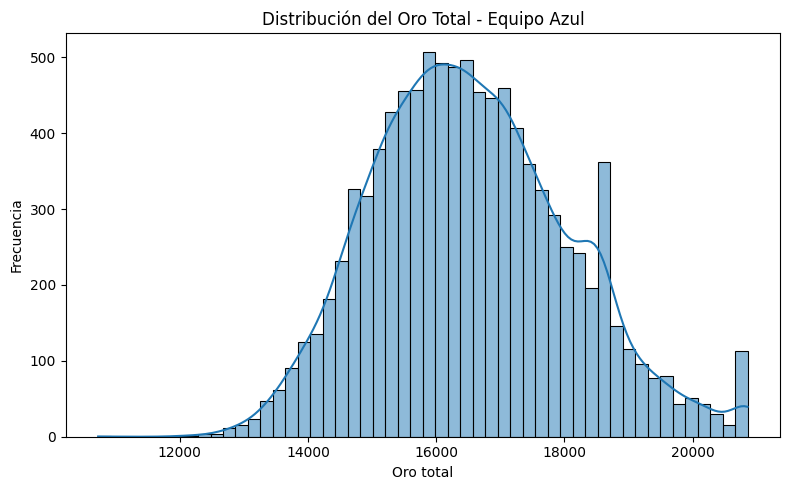

In [2]:
from src.viz import plot_gold_distribution

plot_gold_distribution(df)

*Observamos en el gráfico que la cantidad de oro que se obtiene con más frecuencia está en un término medio entre 15000 y 17000*

---

Ahora iremos con el oro total agrupado por victorias (Gráfico: **Boxplot**)

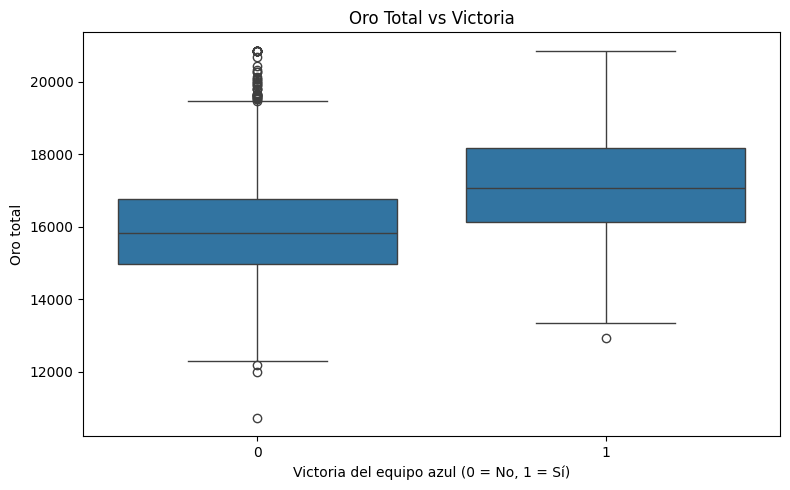

In [3]:
from src.viz import plot_gold_vs_win

plot_gold_vs_win(df)

Aquí observamos que el equipo al ser vencedor obtiene más oro y viceversa, normalmente está relacionado: **A más oro -> Mayor probabilidad de ganar.**

---

Ahora vamos con la gráfica **"Correlation heatMap"** para observar como a **más "kills" mayor oro obtenido.** *(Podriamos poner la combinación de valores en las columnas que quisieramos)*

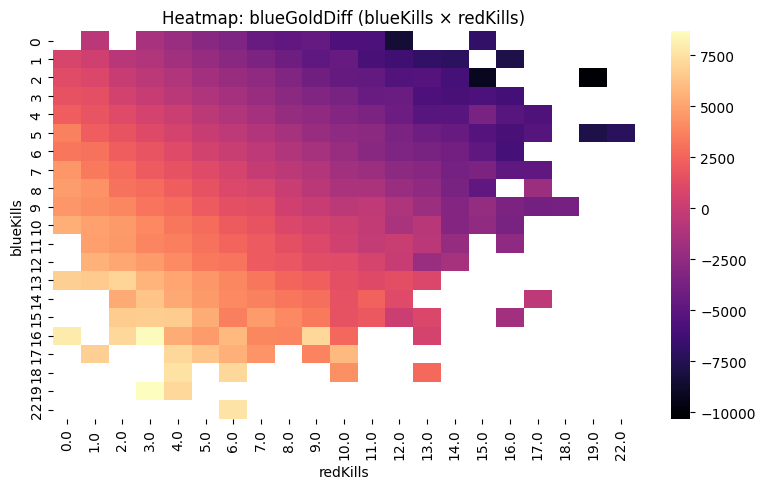

In [4]:
from src.viz import plot_pivot_heatmap

plot_pivot_heatmap(
    df,
    index_col='blueKills',
    columns_col='redKills',
    value_col='blueGoldDiff',
    aggfunc='mean',
    cmap='magma',
    annot=False
)

Observamos como se muestra una mayor diferencia de oro por parte del equipo azul cuando asesina más al rival y viceversa.

---

Aquí vamos a comparar cualquier métrica del **equipo azul vs equipo rojo** utilizando **BarPlot** + valores que queramos saber


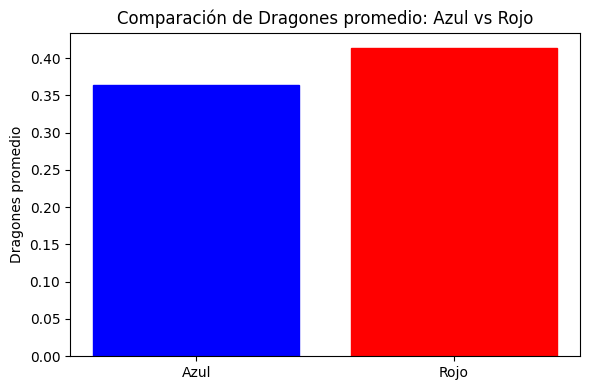

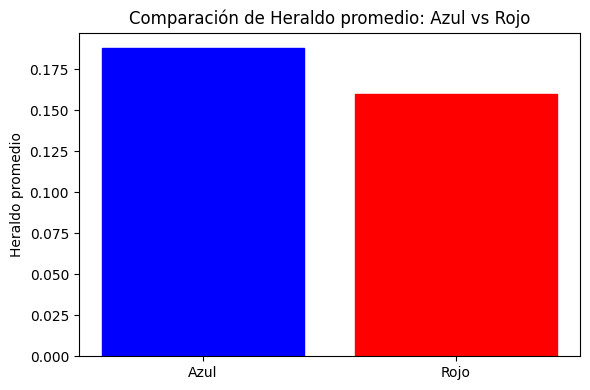

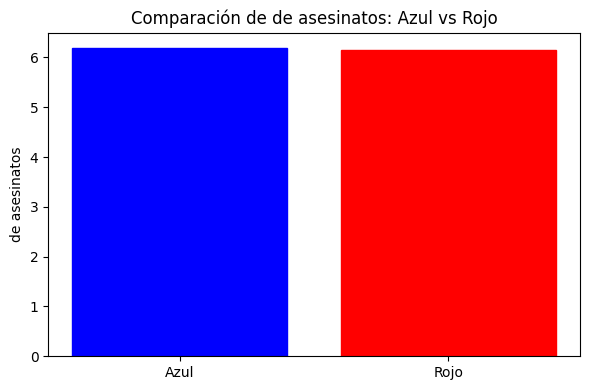

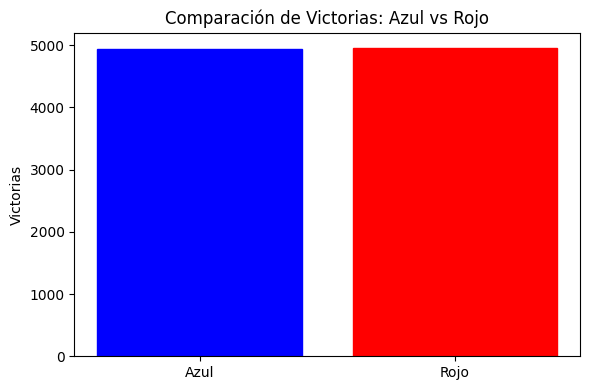

In [5]:
from src.viz import plot_team_comparison

# Vamos a comparar qué equipo suele matar a más dragones
plot_team_comparison(
    df,
    'blueDragons',
    'redDragons',
    'Dragones promedio',
    'mean'
)

# Vamos a comparar qué equipo suele matar a más Heraldo
plot_team_comparison(
    df,
    'blueHeralds',
    'redHeralds',
    'Heraldo promedio',
    'mean'
)
# Compararemos también quien suele matar más
plot_team_comparison(
    df,
    'blueKills',
    'redKills',
    'de asesinatos',
    'mean'
)

# Y por último la media de victorias, comprobemos qué equipo suele ganar más
df = create_win_features(df)

plot_team_comparison(
    df,
    'blueWins',
    'redWins',
    'Victorias',
    'sum'
)

Gracias a estas gráficas podemos observar que aunque cada equipo suele tener unas ventajas diferentes (rojo es más propenso a matar más dragones y azul es más propenso a matar heraldos) y por ello tienen una probabilidad de victoria bastante similar. Esto nos muestra claramente que el juego está balanceado y que no importa desde qué posición empieces (rojo o azul) **tienes prácticamente las mismas probabilidades de ganar y perder.**

---

***Gráficas adicionales***

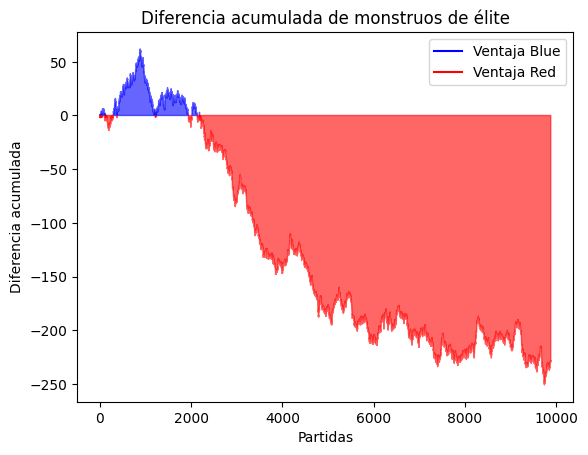

In [6]:
df = create_diff_features(df)
# Comparemos por ejemplo asesinatos de monstruos de élite utilizando otra gráfica:

plot_fill_between_diff(df, 'eliteMonstersDiff', 'monstruos de élite')

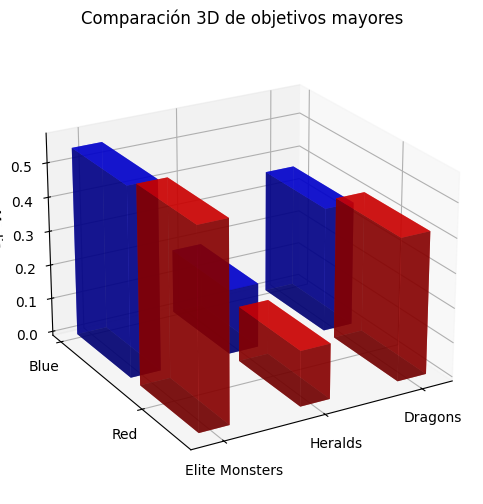

In [7]:
# Compararemos ahora la dominancia por equipo utilizando una gráfica 3D
plot_objectives_3d(df)


Por último vemos en esta gráfica 3D como el equipo rojo domina en monstruos de élite y dragones pero el azul destaca ligeramente en heraldos. Esto se debe a la distribución del mapa y la posición inicial de ambos equipos.